In [4]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import numpy as np                                   # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                  # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                      # 시각화 설정 클래스입니다.

from sklearn.tree import DecisionTreeRegressor     # 사용할 머신러닝 알고리즘입니다.
from sklearn.tree import plot_tree                   # 의사결정나무 시각화 함수입니다.


plt.rcParams['figure.figsize'] = [16, 8]

# 학습 데이터를 불러옵니다.
train = pd.read_csv('./sample_data/california_housing_train.csv', sep=',', encoding='utf-8')
x_train = train.drop('median_house_value', axis=1).values
y_train = train['median_house_value'].values

# 테스트 데이터를 불러옵니다.
test = pd.read_csv('./sample_data/california_housing_test.csv', sep=',', encoding='utf-8')
x_test = test.drop('median_house_value', axis=1).values
y_test = test['median_house_value'].values

# 모델을 생성합니다.
model = DecisionTreeRegressor(
    max_depth=4
)

# 테스트 데이터로 모델을 학습합니다.
model.fit(x_train, y_train)

# 테스트 데이터로 예측합니다.
pred = model.predict(x_test)
test['prediction_house_value'] = pred

# 테스트 데이터로 오차를 확인합니다.
print('R-squared: ', model.score(x_test, y_test))

R-squared:  0.5301602233594886


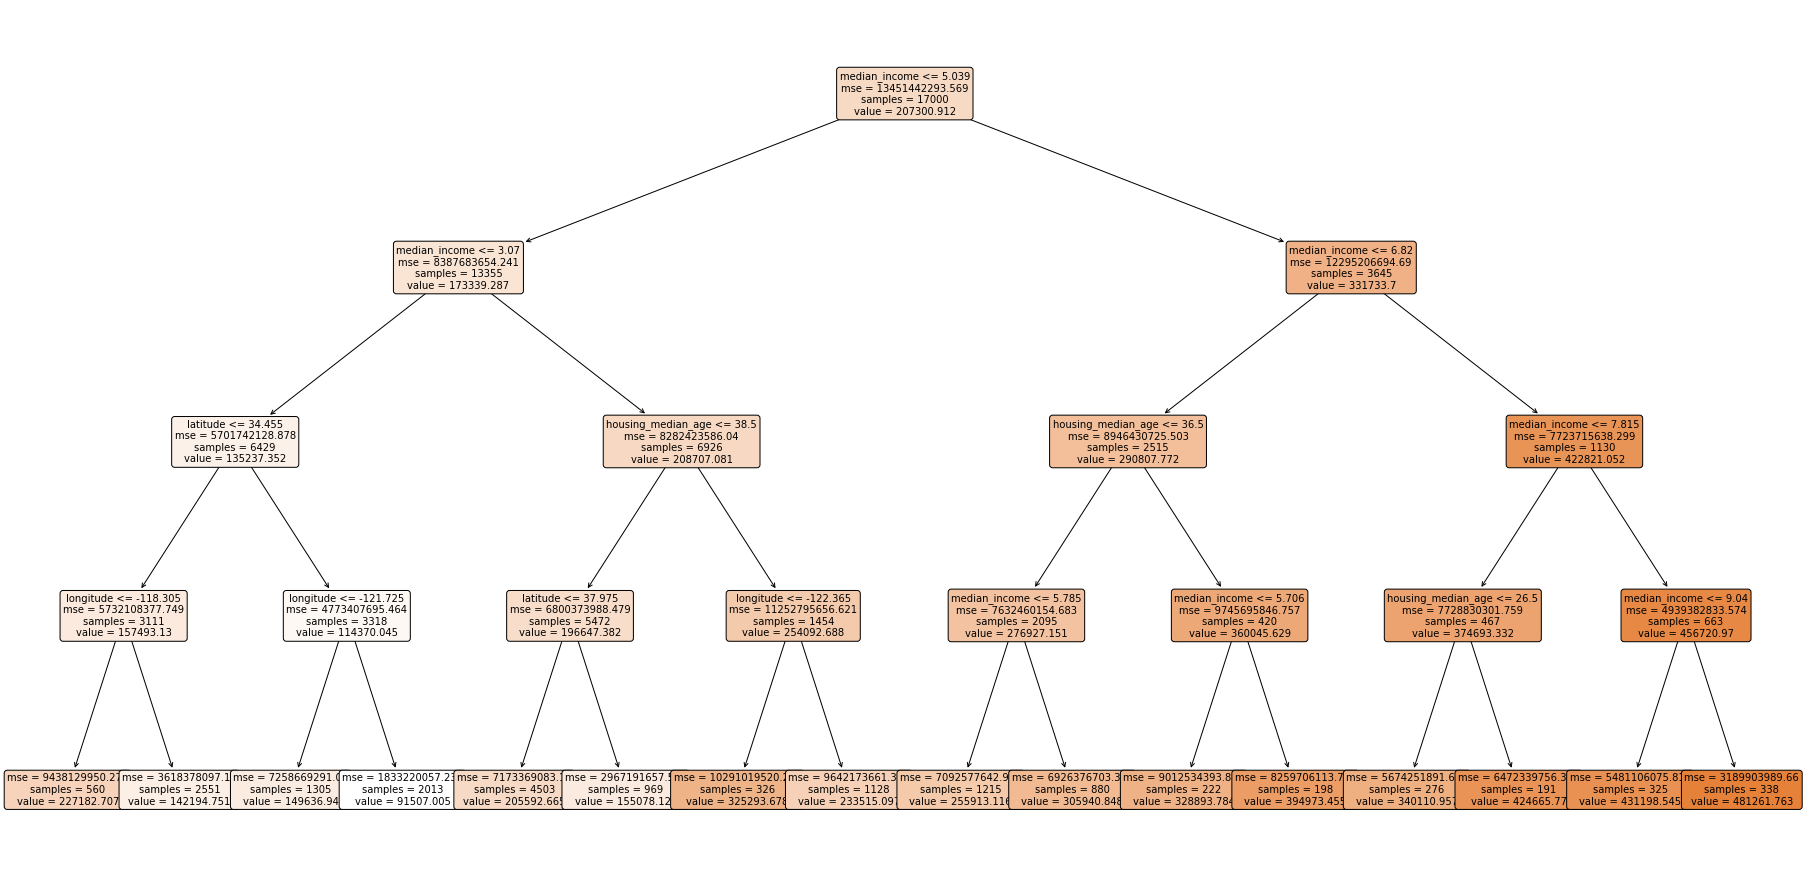

In [9]:
plt.figure(figsize=(32, 16))
plot_tree(
    decision_tree=model,
    feature_names=test.columns[:-1],
    filled=True,
    proportion=False,
    rounded=True,
    fontsize=10
)
plt.show()